# Clustering with K Means

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

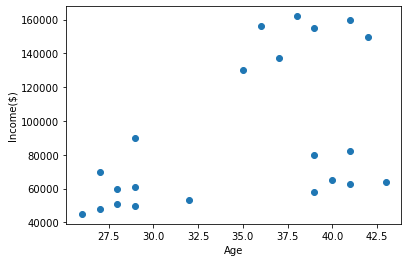

In [9]:
%matplotlib inline

plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [10]:
df.drop('Name', axis='columns', inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [13]:
km.fit_predict(df)

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
y_predicted = km.fit_predict(df)

In [15]:
df['cluster'] = y_predicted
df.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [16]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

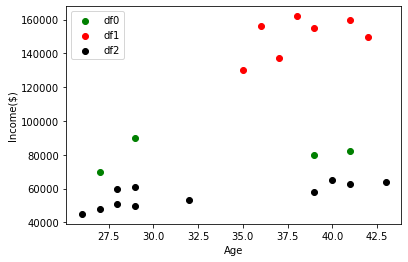

In [23]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green', label='df0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='df1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='df2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

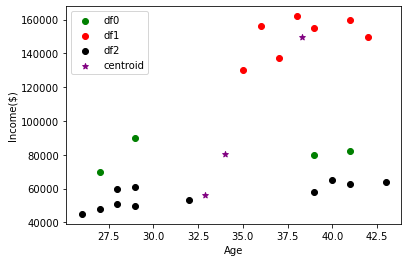

In [22]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green', label='df0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='df1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='df2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

## Preprocessing using min max scaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [32]:
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


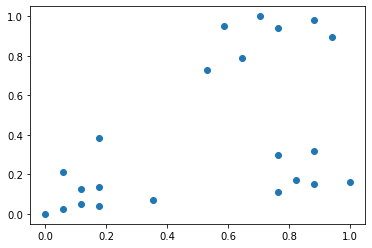

In [33]:
plt.scatter(df['Age'], df['Income($)'])

In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [39]:
df['cluster'] = y_predicted
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [40]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

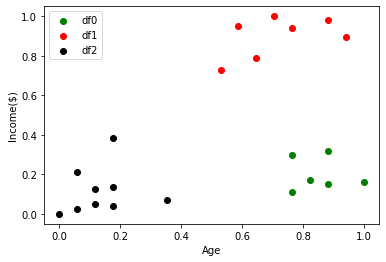

In [43]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green', label='df0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='df1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='df2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

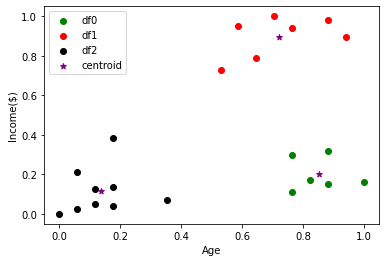

In [44]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'], df0['Income($)'], color='green', label='df0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='df1')
plt.scatter(df2['Age'], df2['Income($)'], color='black', label='df2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

**Elbow Plot**

In [46]:
sse = []
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\Mehta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


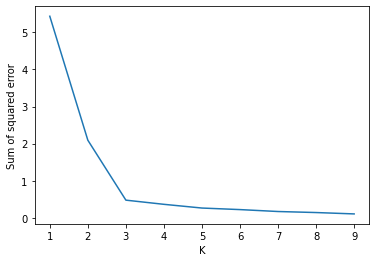

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

**Exercise**

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k